**SPAM DETECTION USING SVM**

Connect to google drive as I have my dataset in mydrive folder.

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Now lets' set up a machine learning pipeline for text classification using a Support Vector Machine (SVM).

In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score
from nltk.tokenize import word_tokenize
!pip install scikit-learn
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
!pip install nltk
import nltk
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import joblib

Locate and replace the filepath to the location of the dataset accordingly

In [3]:
filepath = '/content/drive/My Drive/spam_ham_dataset.csv' #path to the location of file

Read the dataset using pandas library.

In [4]:
dataset = pd.read_csv(filepath)

Now we should gather the relevant format our dataset is in. We may require some preprocessing as we only use useful form of data. For example, we can drop empty fields in the dataset.

In [5]:
print(dataset.head(120))
# Drop the 'Unnamed: 0' column
dataset= dataset.drop(columns=['Unnamed: 0'])
dataset = dataset.dropna()

     Unnamed: 0 label                                               text  \
0           605   ham  Subject: enron methanol ; meter # : 988291\r\n...   
1          2349   ham  Subject: hpl nom for january 9 , 2001\r\n( see...   
2          3624   ham  Subject: neon retreat\r\nho ho ho , we ' re ar...   
3          4685  spam  Subject: photoshop , windows , office . cheap ...   
4          2030   ham  Subject: re : indian springs\r\nthis deal is t...   
..          ...   ...                                                ...   
115        5140  spam  Subject: young pussies\r\ntonya could feel the...   
116        1246   ham  Subject: settelement request for an equistar "...   
117         309   ham  Subject: re : lindholm oil , inc .\r\nthe new ...   
118        2574   ham  Subject: noms / actual flow for 14 th / 15 th\...   
119         315   ham  Subject: nom for 2 / 17\r\nfor 2 / 17 , the no...   

     label_num  
0            0  
1            0  
2            0  
3            1  
4 

info and describe helps us provide more insight of the dataset.

In [6]:
print(dataset.info())
print(dataset.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5171 entries, 0 to 5170
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   label      5171 non-null   object
 1   text       5171 non-null   object
 2   label_num  5171 non-null   int64 
dtypes: int64(1), object(2)
memory usage: 121.3+ KB
None
         label_num
count  5171.000000
mean      0.289886
std       0.453753
min       0.000000
25%       0.000000
50%       0.000000
75%       1.000000
max       1.000000


Tokenization is the process of splitting text into smaller components called tokens. These tokens can be individual words, phrases, or even characters, depending on the level of granularity you want. For example, the sentence: "Hello, world!" can be tokenized into the following tokens:

Word-level tokenization: ["Hello", ",", "world", "!"]

Character-level tokenization: ["H", "e", "l", "l", "o", ",", " ", "w", "o", "r", "l", "d", "!"]

In [7]:
nltk.download('punkt')

def tokenize(text):
    return nltk.word_tokenize(text) # Use nltk.word_tokenize

dataset['tokenized_text'] = dataset['text'].apply(tokenize)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


Here we can observe the tokenized form of the texts.

**Why is Tokenization Important?**

**Data Preparation**: Most machine learning algorithms, especially those in NLP, work with numerical data. Tokenization helps convert text into a format that can be processed by these algorithms.

**Feature Extraction**: Once text is tokenized, features can be extracted. For example, in the bag-of-words model, the presence or absence of tokens (words) becomes features for classification tasks.

**Text Analysis**: Tokenization enables a variety of analyses, such as counting word frequency, identifying sentiment, and understanding language patterns.

**Understanding Context**: In certain tokenization strategies, the context of words can be preserved, aiding in the development of models that understand semantic meaning (e.g., n-grams).

In [8]:
print(dataset.head())

  label                                               text  label_num  \
0   ham  Subject: enron methanol ; meter # : 988291\r\n...          0   
1   ham  Subject: hpl nom for january 9 , 2001\r\n( see...          0   
2   ham  Subject: neon retreat\r\nho ho ho , we ' re ar...          0   
3  spam  Subject: photoshop , windows , office . cheap ...          1   
4   ham  Subject: re : indian springs\r\nthis deal is t...          0   

                                      tokenized_text  
0  [Subject, :, enron, methanol, ;, meter, #, :, ...  
1  [Subject, :, hpl, nom, for, january, 9, ,, 200...  
2  [Subject, :, neon, retreat, ho, ho, ho, ,, we,...  
3  [Subject, :, photoshop, ,, windows, ,, office,...  
4  [Subject, :, re, :, indian, springs, this, dea...  


Split the dataset in 70-30 ratio for training and testing respectively.

In [10]:
#Split the dataset into training and test sets (70% training, 30% test)
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

**TF-IDF (Term Frequency-Inverse Document Frequency)**

TF-IDF is a statistical measure used to evaluate the importance of a word in a document relative to a collection (corpus) of documents.

Tokenization breaks down text into manageable parts, while TF-IDF provides a way to quantify the significance of those parts.

In [11]:
vectorizer = TfidfVectorizer()

#Fit the vectorizer to the training data and transform it
X_train_vec = vectorizer.fit_transform(X_train.apply(lambda x: ' '.join(x))) # Join the tokens back into a string

#Transform the test data using the fitted vectorizer
X_test_vec = vectorizer.transform(X_test.apply(lambda x: ' '.join(x))) # Join the tokens back into a string

Verify if the shape for input is valid or not.

In [ ]:
print(X_train_vec.shape)
print(X_test_vec.shape

**Choosing the Right Kernel**

Linear Kernel: Use it when you suspect that your data is linearly separable.

Polynomial Kernel: Use it for datasets with polynomial relationships.

RBF Kernel: This is often a good default choice when dealing with non-linear data. It's flexible and can model complex decision boundaries.

Sigmoid Kernel: Rarely used, primarily for specific scenarios or comparisons.

Precomputed Kernel: Useful when you have specific domain knowledge or need to incorporate additional similarity measures.

In [12]:
#Train the SVM model with the transformed data
svm_model = SVC(kernel='linear', C=1)
svm_model.fit(X_train_vec, y_train)

SVC(C=1, kernel='linear')

In [13]:
y_pred = svm_model.predict(X_test_vec)

Saving the model

In [15]:
# Save the model
joblib.dump(svm_model, f'SVM_model.pkl')

['SVM_model.pkl']

In [16]:
# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.9877577319587629
Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.99      0.99      1121
           1       0.97      0.99      0.98       431

    accuracy                           0.99      1552
   macro avg       0.98      0.99      0.98      1552
weighted avg       0.99      0.99      0.99      1552



**Interpretation**

High Accuracy: The model achieves a very high accuracy, indicating effective classification.

Class 0 Performance: The model performs exceptionally well on class 0 with both precision and recall near 1.0.

Class 1 Performance: The model also performs well on class 1, although the precision is slightly lower than for class 0. This is acceptable, especially since the recall is high, meaning it identifies most of the true positives.

Balanced Performance: The macro and weighted averages suggest that the model is robust across both classes, even with some imbalance in the number of samples (more instances of class 0).

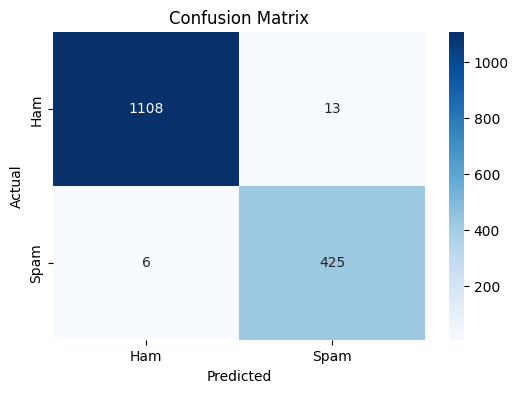

In [17]:
# Calculate and plot the confusion matrix
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Ham', 'Spam'], yticklabels=['Ham', 'Spam'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

Using user input for predictions

In [20]:
def clean_user_input(text):
  def tokenize(text):
    return nltk.word_tokenize(text) # Use nltk.word_tokenize

  return text



In [21]:
# Function to classify user input as spam or ham
def predict_spam(user_input):
    cleaned_input = clean_user_input(user_input)
    input_tfidf = vectorizer.transform([cleaned_input])  # Vectorize the input
    prediction = svm_model.predict(input_tfidf)

    if prediction == 0:
        return "Ham"
    else:
        return "Spam"

# Ask for user input and make prediction
user_input = input("Enter the email text to classify as spam or ham: ")
result = predict_spam(user_input)
print(f"The email is classified as: {result}")

Enter the email text to classify as spam or ham: Dear sir,  Link issue has been resolved thankyou for yours coordination.   best Regards Kotdanda station
The email is classified as: Spam
